In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read the data
sup_rand_accs = np.genfromtxt('accs/sup_val_accs.txt')
sup_strat_rand_accs = np.genfromtxt('accs/sup_val_accs_stratified.txt')
semi_strat_rand_accs = np.genfromtxt('accs/semi_sup_accs_stratified.txt')
sup_unc_accs = np.genfromtxt('accs/supervised_val_accs_uncertainty_10.txt')
sup_unc_accs.shape

(41,)

In [22]:
#Obtain the 1st accuracy above the threshold(0.81) and percentage of data used to obtain that accuracy
all_accs = [sup_rand_accs,sup_strat_rand_accs,semi_strat_rand_accs,sup_unc_accs]
print('Accuracy % Data used ')
for acc in all_accs:
    for i,a in enumerate(acc):
        if a > 0.81:
            if acc.tolist() == all_accs[-1].tolist():
                print(a,i+10)
            else:
                print(a,i+1)
            break
    #print(np.mean(acc),np.argmax(acc))

Accuracy % Data used 
0.851 41
0.8160000000000001 35
0.846 7
0.848 17


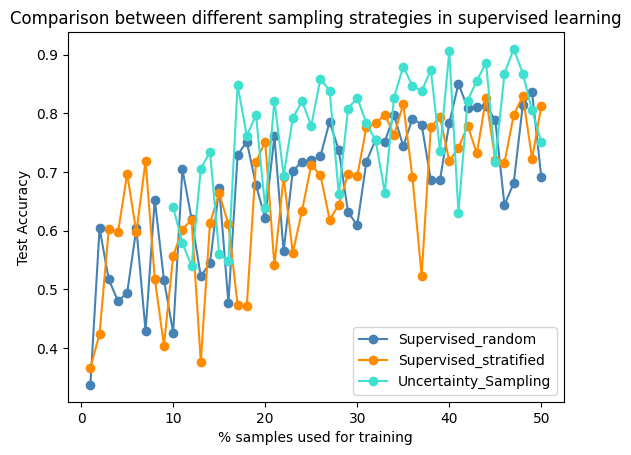

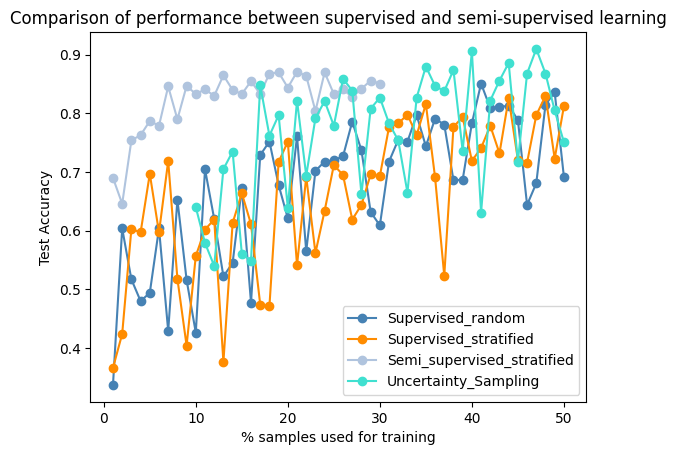

In [14]:
#Generate the plots
def plot_accs(accs,title,color,label):
    len_accs = len(accs)
    plt.plot(range(1,len_accs+1),accs,'-o',c=color,label = label)
    plt.xlabel('% samples used for training')
    plt.ylabel('Test Accuracy')
#     plt.grid()
    plt.title(title)
    plt.legend()
    return

plot_accs(sup_rand_accs,'Supervised Learning with randomized training set',color='steelblue',label = 'Supervised_random')
plot_accs(sup_strat_rand_accs,'Supervised Learning with stratified random training set',color='darkorange',label = 'Supervised_stratified')
plt.plot(range(10,51),sup_unc_accs,'-o',c='turquoise',label = 'Uncertainty_Sampling')
plt.title('Comparison between different sampling strategies in supervised learning')
plt.legend()
plt.show()
plot_accs(sup_rand_accs,'Supervised Learning with randomized training set',color='steelblue',label = 'Supervised_random')
plot_accs(sup_strat_rand_accs,'Supervised Learning with stratified random training set',color='darkorange',label = 'Supervised_stratified')
plot_accs(semi_strat_rand_accs,'Semi-Supervised Learning with stratified random training set',color='lightsteelblue',label = 'Semi_supervised_stratified')
plt.plot(range(10,51),sup_unc_accs,'-o',c='turquoise',label = 'Uncertainty_Sampling')
plt.title('Comparison of performance between supervised and semi-supervised learning')
plt.legend()
plt.show()

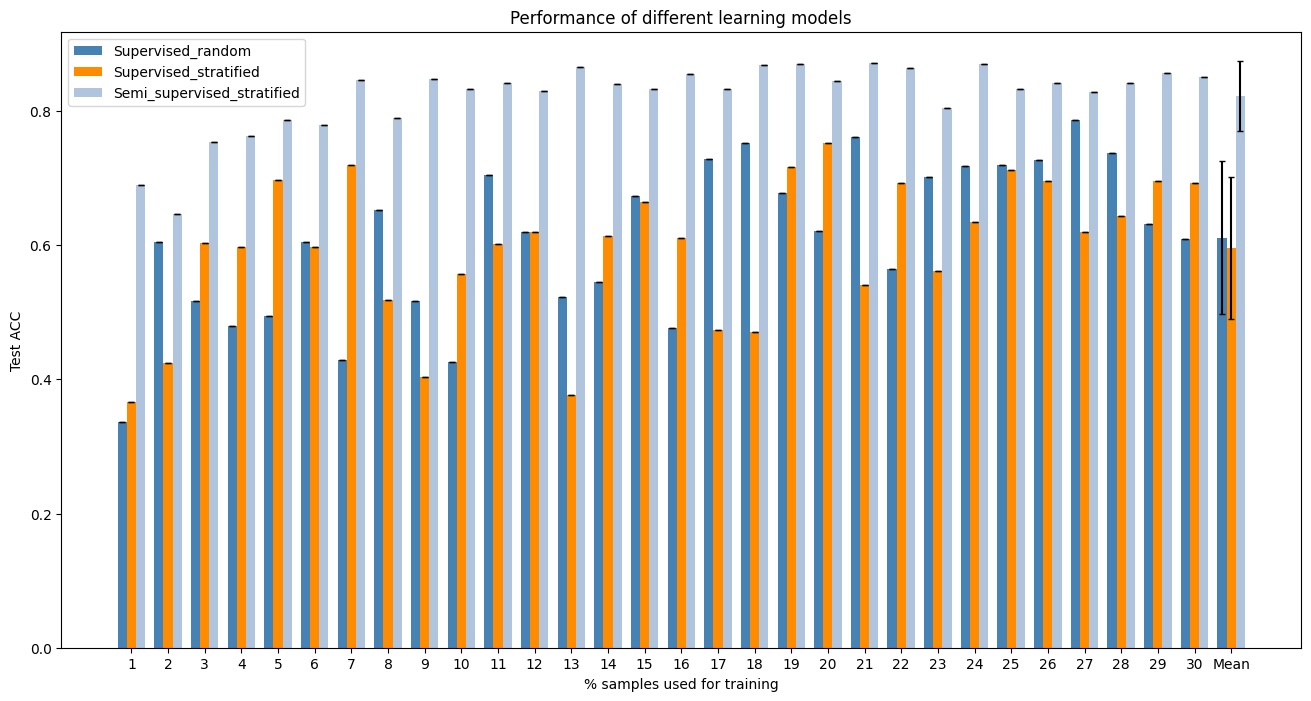

In [51]:
#Generate grouped bar plot for sup (rand, strat) and semi-sup(strat)
bar_width = 0.25
x = np.arange(1,32)
x_axis = list(range(1, 31)) + ['Mean']

curr_sup_accs = list(sup_rand_accs[:30])
curr_sup_strat_accs = list(sup_strat_rand_accs[:30])

sup_accs_with_mean = curr_sup_accs + [np.mean(curr_sup_accs)]
sup_strat_accs_with_mean = curr_sup_strat_accs + [np.mean(curr_sup_strat_accs)]
semi_strat_with_mean = list(semi_strat_rand_accs) + [np.mean(list(semi_strat_rand_accs))]

SDE_sup = [0]*30 + [np.std(curr_sup_accs)]
SDE_sup_strat = [0]*30 + [np.std(curr_sup_strat_accs)]
SDE_semi_strat = [0]*30 + [np.std(semi_strat_rand_accs)]

plt.figure(figsize=(16,8))



# Create the grouped bar chart
plt.bar(x - bar_width, sup_accs_with_mean,yerr = SDE_sup, width=bar_width, label='Supervised_random',capsize = 2,color = 'steelblue')
plt.bar(x, sup_strat_accs_with_mean, yerr = SDE_sup_strat,width=bar_width, label='Supervised_stratified',capsize = 2,color = 'darkorange')
plt.bar(x + bar_width, semi_strat_with_mean,yerr = SDE_semi_strat, width=bar_width, label='Semi_supervised_stratified',capsize = 2,color = 'lightsteelblue')

plt.ylabel('Test ACC')
plt.xlabel('% samples used for training')
plt.xticks(x,x_axis)
plt.title('Performance of different learning models')
plt.legend()
plt.show()